In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [5]:
df=pd.read_csv("BankChurners.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Count the number and percentage of attrited and existing customer

In [5]:
print(df["Attrition_Flag"].unique())

['Existing Customer' 'Attrited Customer']


In [6]:
n1=df['Attrition_Flag'].loc[df['Attrition_Flag']=='Existing Customer'].count()
n2=df['Attrition_Flag'].loc[df['Attrition_Flag']=='Attrited Customer'].count()
print("Number of existed and attrited are",n1,"and",n2)
print("Percentage of existing customer is",(n1/(n1+n2))*100)
print("Percentage of attrited customer is",(n2/(n1+n2))*100)

Number of existed and attrited are 8500 and 1627
Percentage of existing customer is 83.934037720944
Percentage of attrited customer is 16.065962279055988


# Plot the graph of distribution of attrited customers which is categorised by 1).gender  2).education level


4072 4428 697 930


Text(0.5, 1.0, 'Categorised by gender')

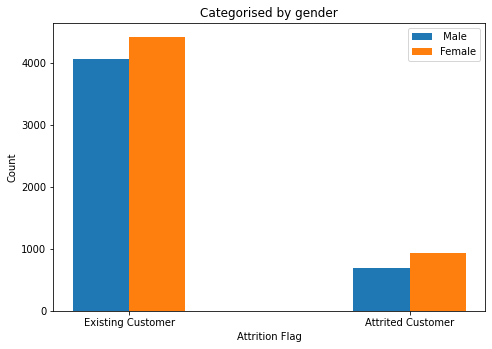

In [7]:
g=df.groupby("Gender")
m=g.get_group("M")
f=g.get_group("F")
n1=m['Attrition_Flag'].loc[m['Attrition_Flag']=="Existing Customer"].count()
n2=f['Attrition_Flag'].loc[f['Attrition_Flag']=="Existing Customer"].count()
t1=m['Attrition_Flag'].loc[m['Attrition_Flag']=="Attrited Customer"].count()
t2=f['Attrition_Flag'].loc[f['Attrition_Flag']=="Attrited Customer"].count()
print(n1,n2,t1,t2)

data = [[n1,t1],[n2,t2]]
X=np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X, data[0],  width = 0.2)
ax.bar(X+0.2, data[1], width = 0.2)
ax.legend(labels=[' Male', 'Female'])
ax.set_xlabel('Attrition Flag')
ax.set_ylabel('Count')
plt.xticks([0.1,1.10],["Existing Customer","Attrited Customer"])
ax.set_title('Categorised by gender')

In [8]:
print(df["Education_Level"].unique())

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


Count of High School existing customers is 1707
Count of High School attrited customers is 306
Count of Graduate existing customers is 2641
Count of Graduate attrited customers is 487
Count of Uneducated existing customers is 1250
Count of Uneducated attrited customers is 237
Count of Unknown existing customers is 1263
Count of Unknown attrited customers is 256
Count of College existing customers is 859
Count of College attrited customers is 154
Count of Post-Graduate existing customers is 424
Count of Post-Graduate attrited customers is 92


Text(0.5, 1.0, 'Categorised by education level')

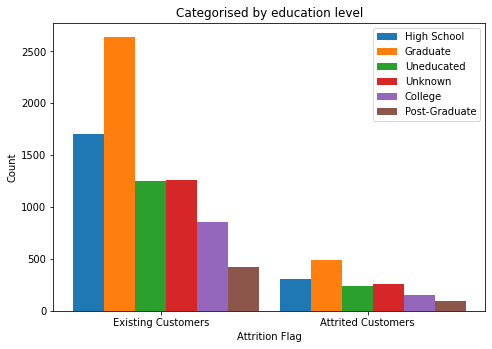

In [11]:
l=df["Education_Level"].unique()
n1=[]
t1=[]
g=df.groupby("Education_Level")
for i in range(6):
    m=g.get_group(l[i])
    n1.append(m['Attrition_Flag'].loc[m['Attrition_Flag']=="Existing Customer"].count())
    t1.append(m['Attrition_Flag'].loc[m['Attrition_Flag']=="Attrited Customer"].count())
    print("Count of",l[i],"existing customers is",n1[i])
    print("Count of",l[i],"attrited customers is",t1[i])

    
data = [[n1[0],t1[0]],[n1[1],t1[1]],[n1[2],t1[2]],[n1[3],t1[3]],[n1[4],t1[4]],[n1[5],t1[5]]]
X=np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X, data[0], width = 0.15)
ax.bar(X+0.15, data[1], width = 0.15)
ax.bar(X+0.30, data[2], width = 0.15)
ax.bar(X+0.45, data[3], width = 0.15)
ax.bar(X+0.60, data[4], width = 0.15)
ax.bar(X+0.75, data[5], width = 0.15)
ax.legend(labels=l)
plt.xticks([0.35,1.35],['Existing Customers','Attrited Customers'])
ax.set_xlabel('Attrition Flag')
ax.set_ylabel('Count')
ax.set_title('Categorised by education level')

# Distribution of Attrited Customer by Education level and Income category

In [10]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

42
Count of $120K + income and College education level Existing customers is 58
Count of $120K + income and College education level attrited customers is 12
Count of $120K + income and Doctorate education level Existing customers is 29
Count of $120K + income and Doctorate education level attrited customers is 8
Count of $120K + income and Graduate education level Existing customers is 172
Count of $120K + income and Graduate education level attrited customers is 32
Count of $120K + income and High School education level Existing customers is 119
Count of $120K + income and High School education level attrited customers is 28
Count of $120K + income and Post-Graduate education level Existing customers is 26
Count of $120K + income and Post-Graduate education level attrited customers is 4
Count of $120K + income and Uneducated education level Existing customers is 96
Count of $120K + income and Uneducated education level attrited customers is 23
Count of $120K + income and Unknown educa

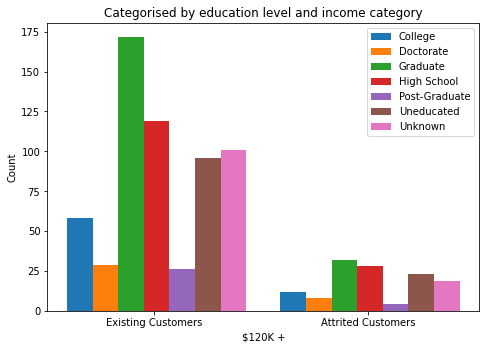

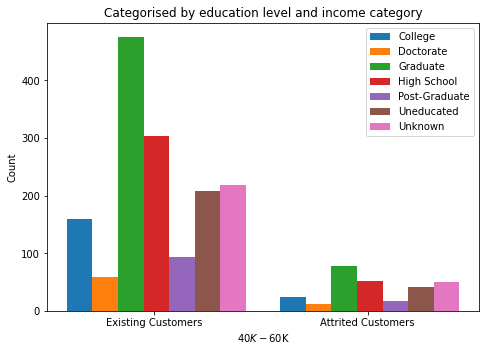

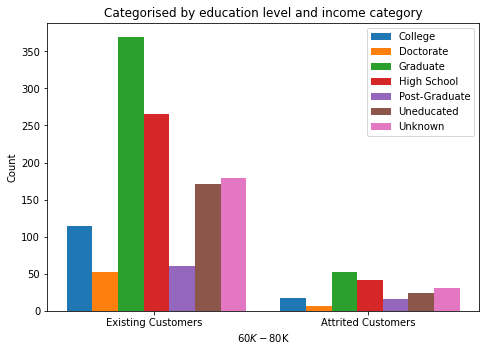

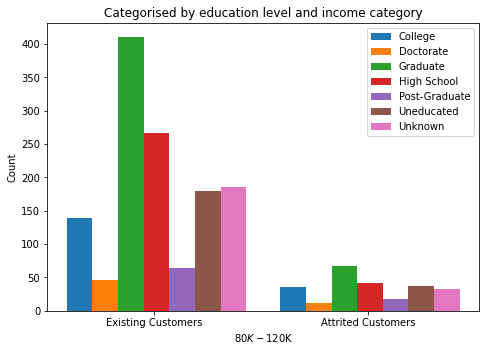

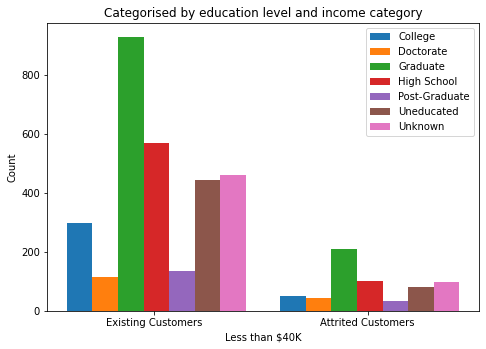

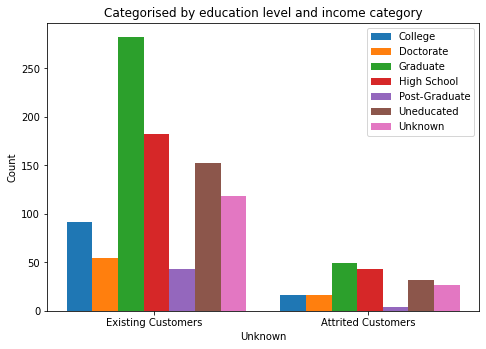

In [59]:
l=[]
n1=[]
t1=[]
g=df.groupby(["Income_Category",'Education_Level'])
for i,name in g:
    l.append(i)  
print(len(l))
for i in range(42):
    m=g.get_group(l[i])
    n1.append(m['Attrition_Flag'].loc[m['Attrition_Flag']=="Existing Customer"].count())
    t1.append(m['Attrition_Flag'].loc[m['Attrition_Flag']=="Attrited Customer"].count())
    print("Count of",l[i][0],"income and",l[i][1],"education level Existing customers is",n1[i])
    print("Count of",l[i][0],"income and",l[i][1],"education level attrited customers is",t1[i])

j=0
for k in range(6):       
    data = [[n1[j],t1[j]],[n1[j+1],t1[j+1]],[n1[j+2],t1[j+2]],[n1[j+3],t1[j+3]],[n1[j+4],t1[j+4]],[n1[j+5],t1[j+5]],[n1[j+6],t1[j+6]]]
    X=np.arange(2)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X, data[0], width = 0.12)
    ax.bar(X+0.12, data[1], width = 0.12)
    ax.bar(X+0.24, data[2], width = 0.12)
    ax.bar(X+0.36, data[3], width = 0.12)
    ax.bar(X+0.48, data[4], width = 0.12)
    ax.bar(X+0.6, data[5], width = 0.12)
    ax.bar(X+0.72, data[6], width = 0.12)
    p=df["Education_Level"].unique()
    m=df["Income_Category"].unique()
    #print(p)
    p.sort()
    m.sort()
    #print(p)
    #print(m)
    ax.legend(labels=p)
    plt.xticks([0.35,1.35],['Existing Customers','Attrited Customers'])
    ax.set_xlabel(m[k])
    ax.set_ylabel('Count')
    ax.set_title('Categorised by education level and income category')
    j=j+7

[None, None, None, None]

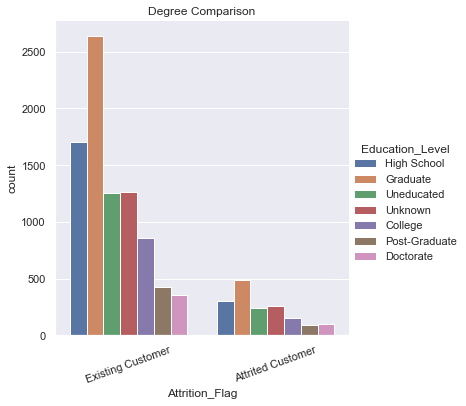

In [8]:
#short
sb.set(rc={'figure.figsize':(10.7,9.7)})
sb.catplot(x = 'Attrition_Flag', data = df, hue='Education_Level',kind='count')
plt.title('Degree Comparison')
locs, labels = plt.xticks()
plt.setp(labels, rotation=20)